<a href="https://colab.research.google.com/github/fox2056/data-science-bootcamp/blob/main/deep_learning_ts_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install numpy==1.26.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 93.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.2 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.__version__

'1.26.2'

In [4]:
data = pd.read_csv('/content/SolarTimeSeriesData.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')
series = data['Incoming Solar']

In [4]:
series[series > 0]

,Incoming Solar
Datetime,
2007-10-01 07:00:00,1.0
2007-10-01 08:00:00,18.5
2007-10-01 09:00:00,35.4
2007-10-01 10:00:00,63.8
2007-10-01 11:00:00,99.4
...,...
2013-09-30 14:00:00,556.2
2013-09-30 15:00:00,508.4
2013-09-30 16:00:00,249.7


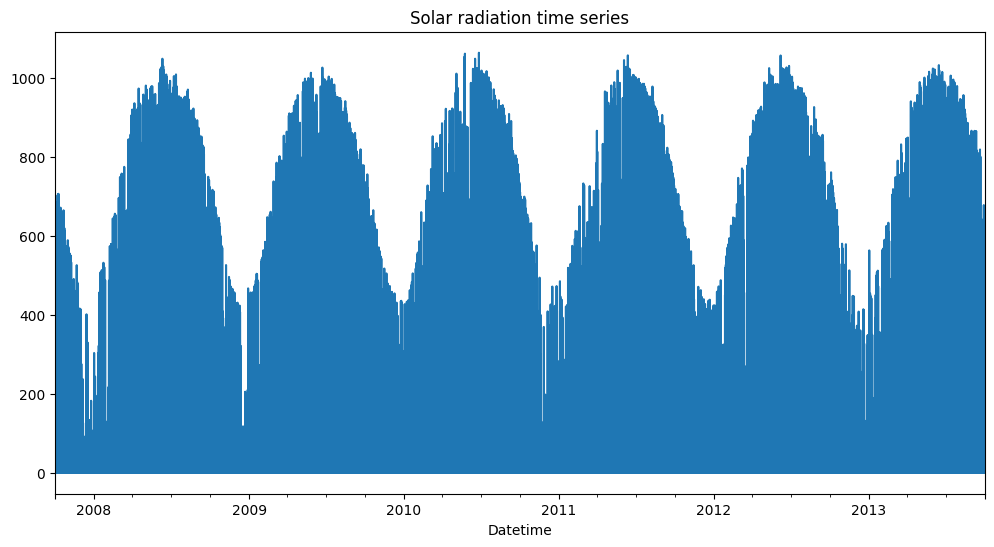

In [5]:
series.plot(figsize=(12, 6), title='Solar radiation time series');

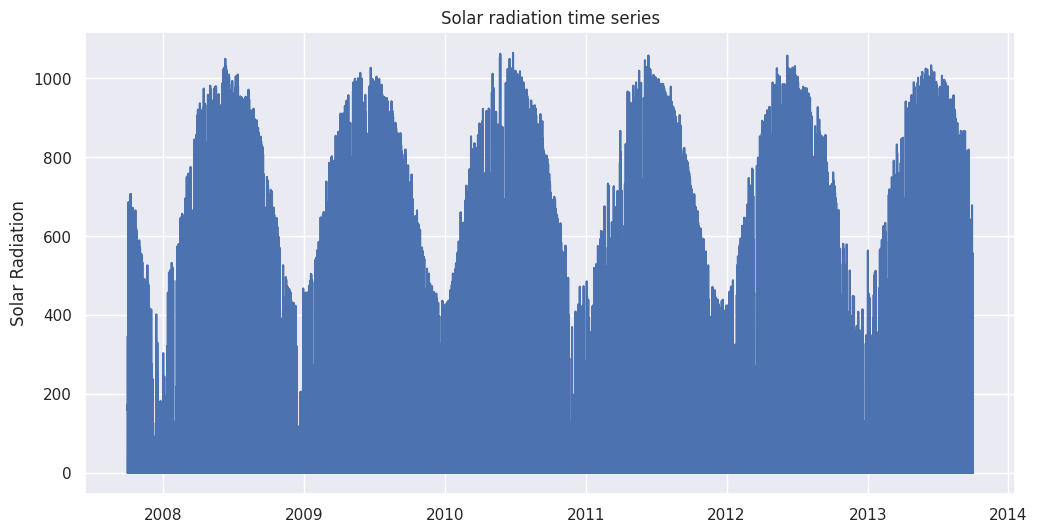

<Figure size 1200x600 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

series_df = series.reset_index()

plt.rcParams['figure.figsize'] = [12, 6]

sns.set_theme(style='darkgrid')
sns.lineplot(x='Datetime', y='Incoming Solar', data=series_df)

plt.ylabel('Solar Radiation')
plt.xlabel('')
plt.title('Solar radiation time series')

plt.show()

plt.savefig('/content/time_series_plot.png')

In [7]:
series_daily = series.resample('D').sum()

### simulation of sale events

In [8]:
n_sales = 1000
start = pd.Timestamp('2023-01-01 09:00')
end = pd.Timestamp('2023-04-01')
n_days = (end - start).days + 1

irregular_series = pd.to_timedelta(np.random.rand(n_sales) * n_days,
                                   unit='D') + start
irregular_series

DatetimeIndex(['2023-01-03 23:07:10.282145828',
               '2023-01-18 20:44:51.842126546',
               '2023-03-05 06:47:26.388413341',
               '2023-03-28 03:57:49.866994722',
               '2023-02-26 06:11:19.442414518',
               '2023-02-25 15:31:50.804299286',
               '2023-02-07 01:02:08.148405327',
               '2023-03-28 14:02:48.219511842',
               '2023-01-06 10:30:25.141078944',
               '2023-02-04 22:29:54.831266802',
               ...
               '2023-02-26 04:09:30.946855147',
               '2023-03-10 18:42:37.390249704',
               '2023-02-09 05:17:27.652207128',
               '2023-01-06 06:11:54.184272961',
               '2023-03-01 21:45:34.044005790',
               '2023-02-22 12:52:50.789119071',
               '2023-03-16 21:14:36.821726580',
               '2023-03-18 20:25:23.537406604',
               '2023-03-19 20:15:45.158052415',
               '2023-01-24 07:30:44.473857960'],
              dtype=

In [9]:
ts_sales = pd.Series(0, index=irregular_series)
tot_sales = ts_sales.resample('D').count()

tot_sales

,0
2023-01-01,10
2023-01-02,15
2023-01-03,14
2023-01-04,10
2023-01-05,12
...,...
2023-03-28,13
2023-03-29,14
2023-03-30,11
2023-03-31,11


### Continue

In [8]:
series_daily

,Incoming Solar
Datetime,
2007-10-01,1381.5
2007-10-02,3953.2
2007-10-03,3098.1
2007-10-04,2213.9
2007-10-05,1338.8
...,...
2013-09-26,1034.2
2013-09-27,2182.3
2013-09-28,3384.5


### Dealing with missing values

In [ ]:
sample_with_nan = series_daily.head(365 * 2).copy()
size_na = int(0.6 * len(sample_with_nan))

idx = np.random.choice(a=range(len(sample_with_nan)),
                       size=size_na,
                       replace=False)

sample_with_nan[idx] = np.nan

sample_with_nan

In [ ]:
average_value = sample_with_nan.mean()
imp_mean = sample_with_nan.fillna(average_value)
imp_mean

In [ ]:
imp_ffill = sample_with_nan.ffill()
imp_bfill = sample_with_nan.bfill()

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, sharex=True)
fig.suptitle('Time series imputation methods')

ax0.plot(sample_with_nan)
ax0.set_title('Original series with missing data')
ax1.plot(imp_mean)
ax1.set_title('Series with mean imputation')
ax2.plot(imp_ffill)
ax2.set_title('Series with ffill imputation')
ax3.plot(imp_bfill)
ax3.set_title('Series with bfill imputation')

plt.tight_layout()

plt.savefig('/content/missing_data_plot.png')

### Continue

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=series_daily,
                            model='additive',
                            period=365)

result

<Axes: xlabel='Datetime'>

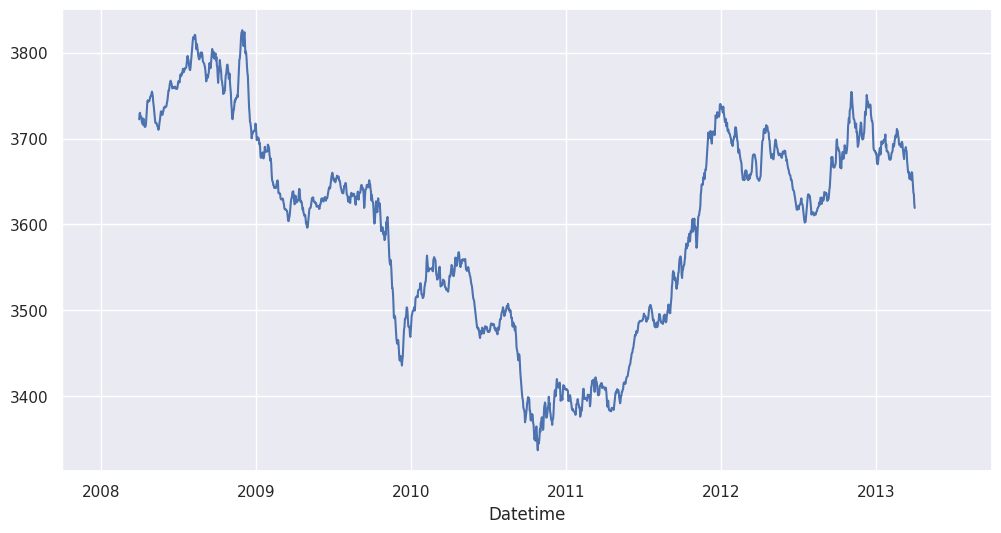

In [10]:
result.trend.plot()

<Axes: xlabel='Datetime'>

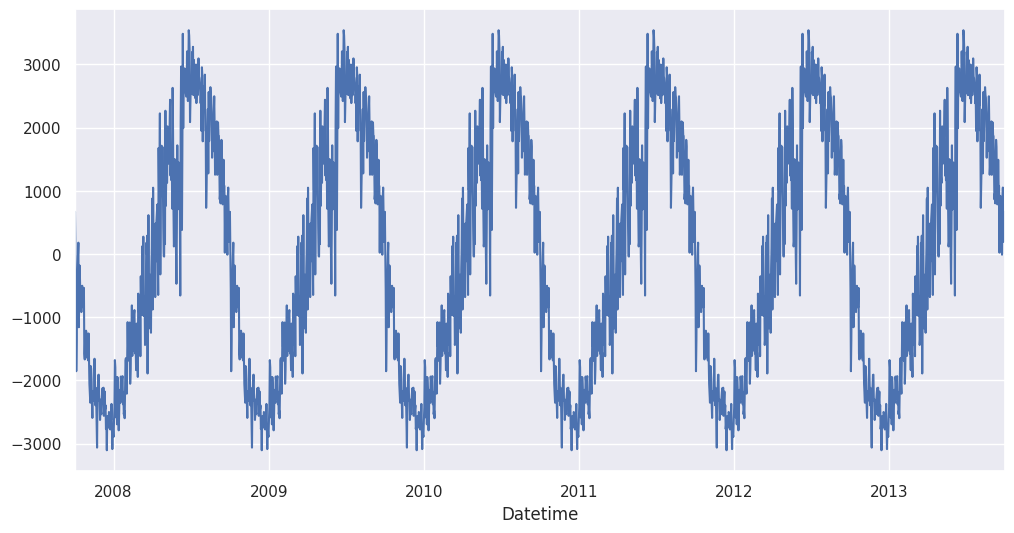

In [11]:
result.seasonal.plot()

<Axes: xlabel='Datetime'>

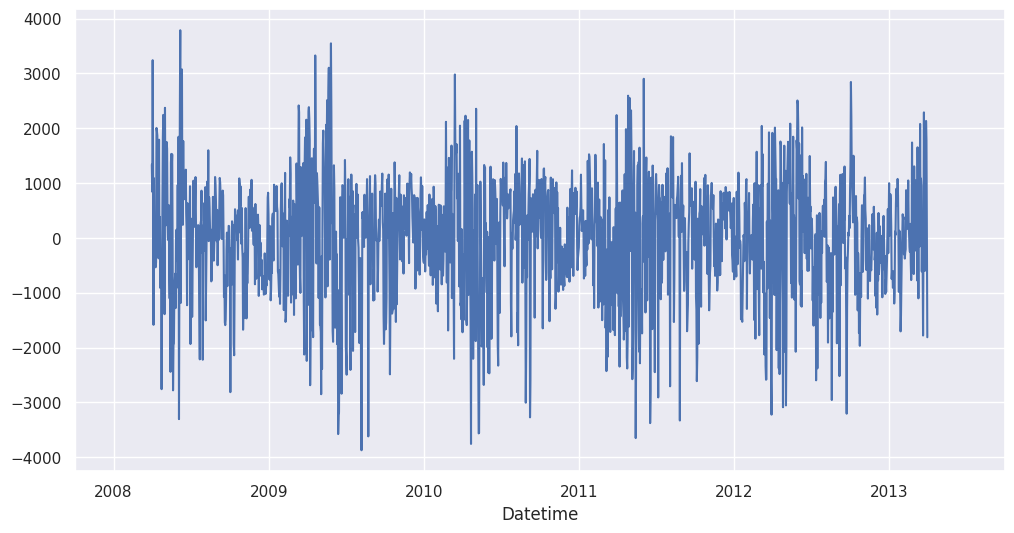

In [12]:
result.resid.plot()

In [13]:
from statsmodels.tsa.seasonal import STL

result = STL(endog=series_daily, period=365).fit()

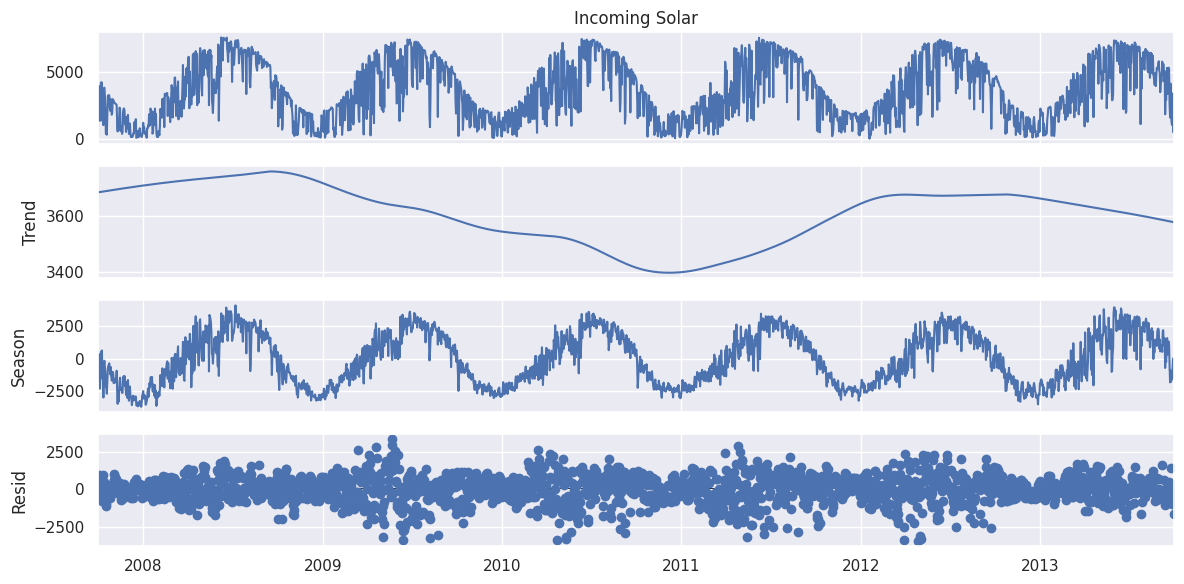

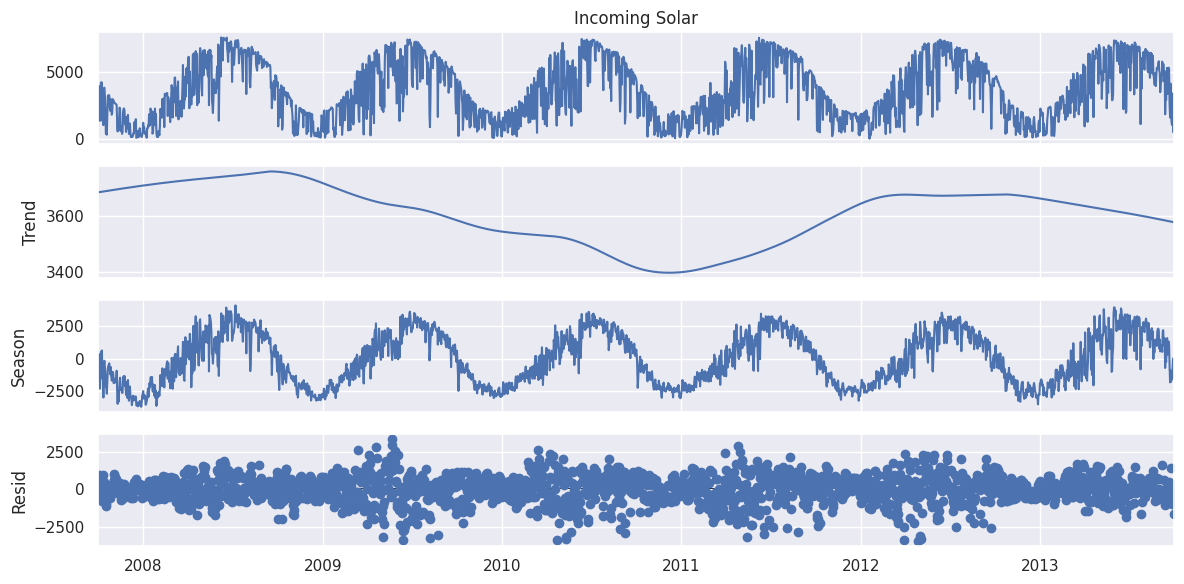

In [14]:
result.plot()

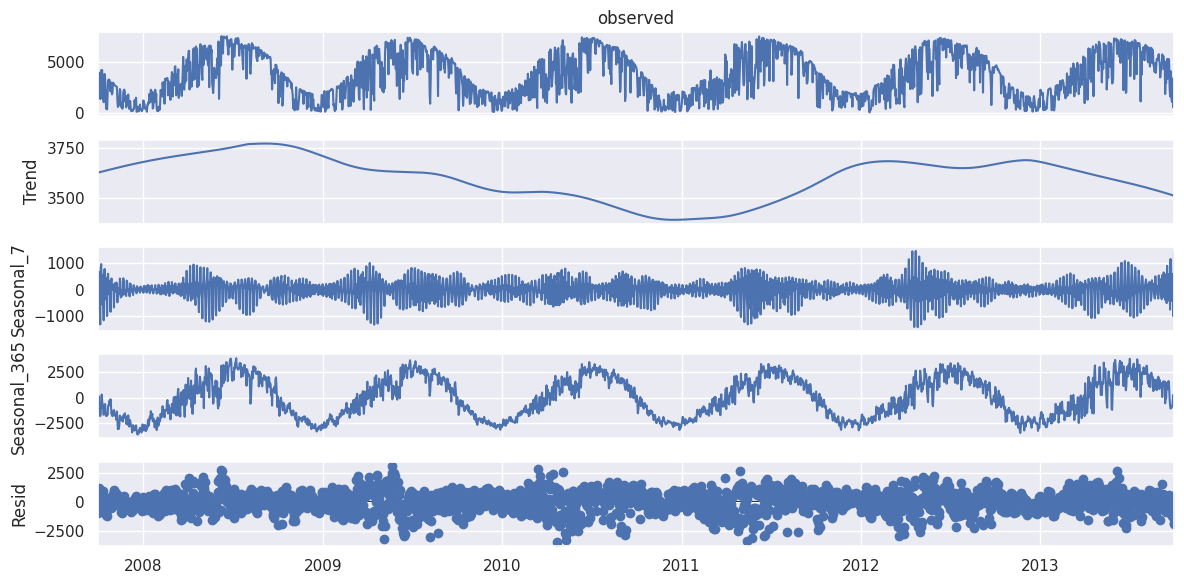

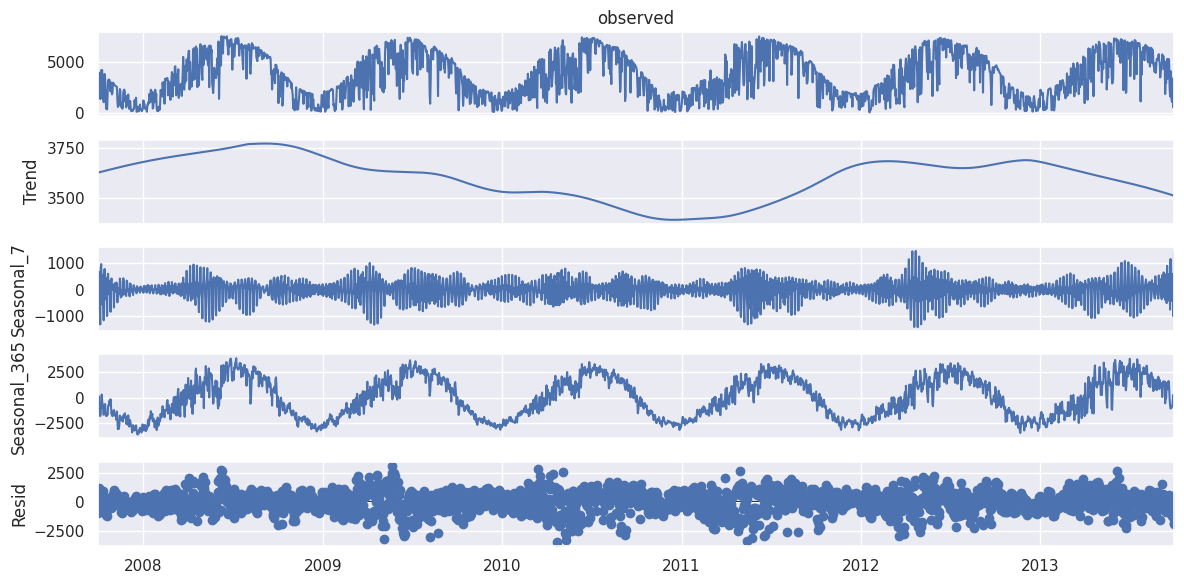

In [15]:
from statsmodels.tsa.seasonal import MSTL

result = MSTL(endog=series_daily, periods=(7, 365)).fit()

result.plot()

In [16]:
from statsmodels.tsa.stattools import acf

acf_scores = acf(x=series_daily, nlags=365)

In [17]:
from statsmodels.tsa.stattools import pacf

pacf_scores = pacf(x=series_daily, nlags=365)

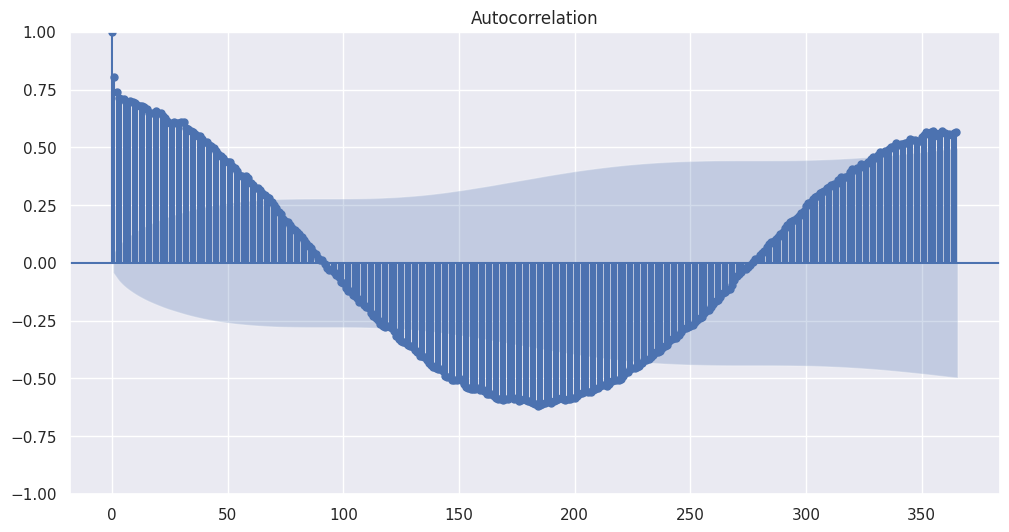

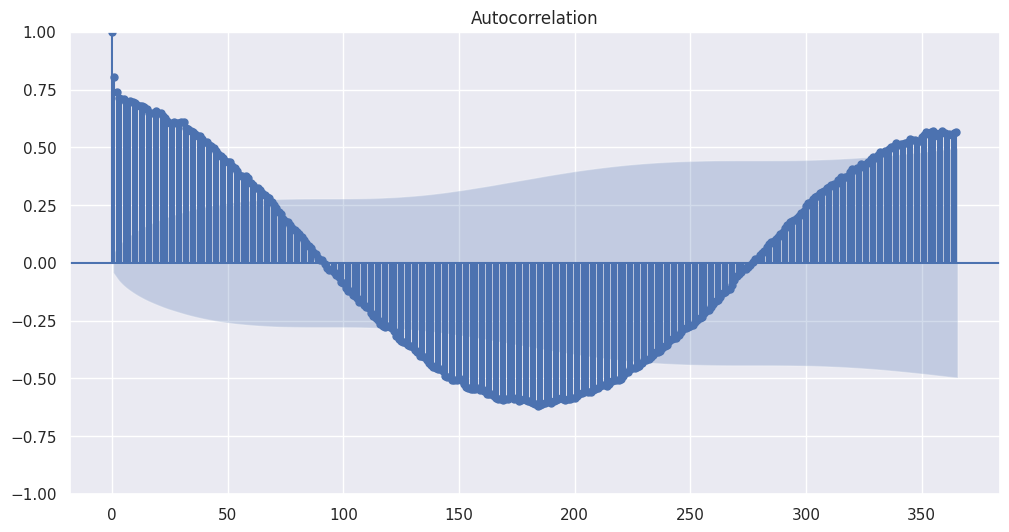

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(x=series_daily, lags=365)

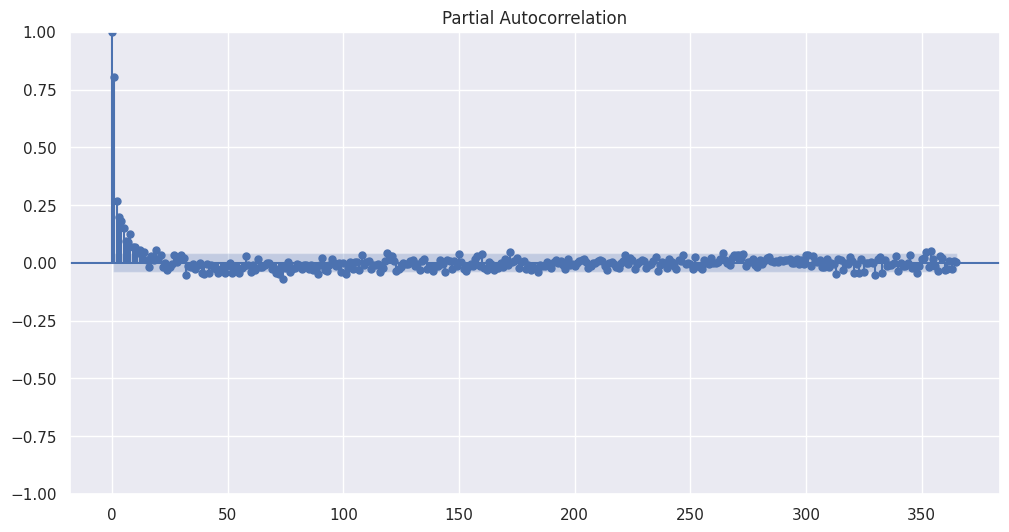

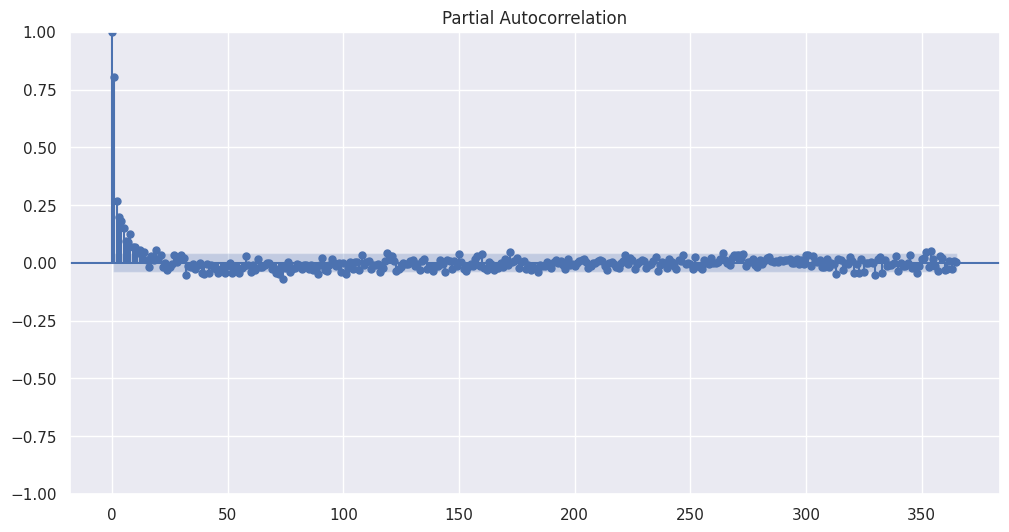

In [19]:
plot_pacf(x=series_daily, lags=365)

In [23]:
from pmdarima.arima import ndiffs

ndiffs(x=series_daily, test='adf')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

1

In [24]:
series_changes = series_daily.diff()

In [28]:
from pmdarima.arima import nsdiffs

nsdiffs(x=series_changes.dropna(), test='ch', m=365)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2

<Axes: xlabel='Datetime'>

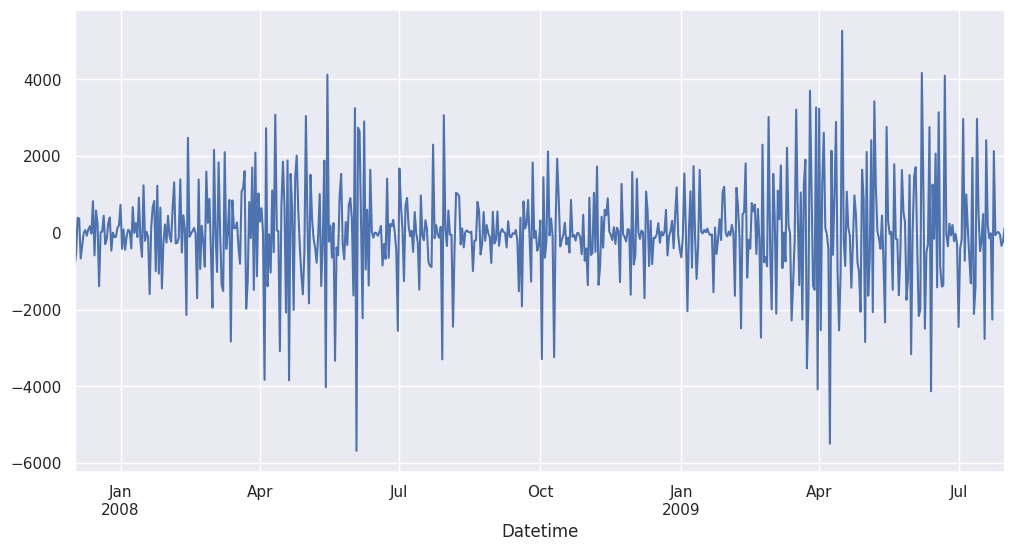

In [35]:
series_changes[(series_changes.index > '2007-12-01') & (series_changes.index < '2009-08-01') ].plot()

In [37]:
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
series_df = series_daily.reset_index(drop=True).reset_index()
series_df.columns = ['time', 'value']
series_df['time'] += 1
olsr = ols('value ~ time', series_df).fit()
_, pval_white, _, _ = sms.het_white(olsr.resid, olsr.model.exog)
_, pval_bp, _, _ = sms.het_breuschpagan(olsr.resid, olsr.model.exog)

In [38]:
pval_white

0.21360455192795955

In [39]:
pval_bp

0.20630757319132864

<Axes: >

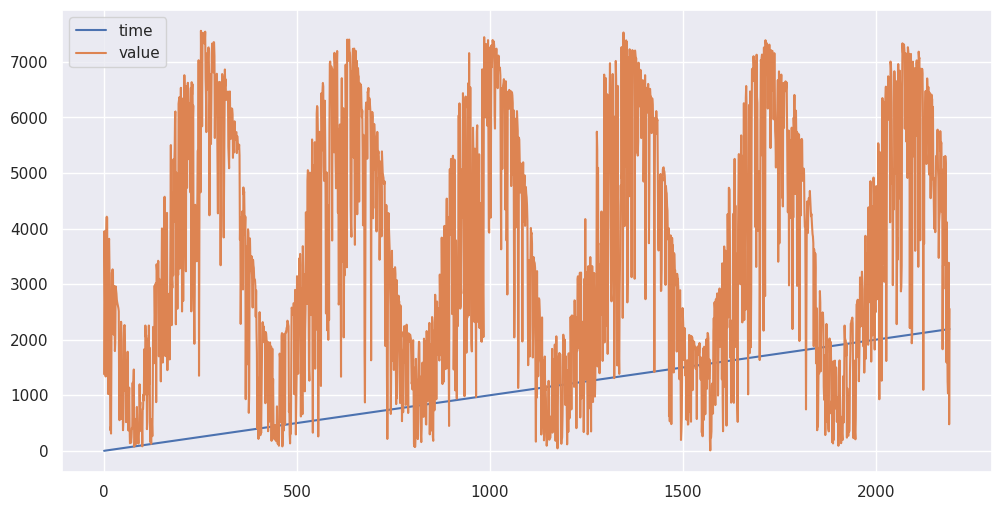

In [40]:
series_df.plot()

In [41]:
class LogTransformation:

  @staticmethod
  def transform(x):
    xt = np.sign(x) * np.log(np.abs(x) + 1)
    return xt

  @staticmethod
  def inverse_transform(xt):
    x = np.sign(xt) * (np.exp(np.abs(xt)) - 1)
    return x

In [42]:
series_log = LogTransformation.transform(series_daily)

In [44]:
from scipy import stats

series_transformed, lmbda = stats.boxcox(series_daily)